# Reducing Customer Churn in Telecommunication: Analyzing Factors and Implementing Retention Strategies

In [51]:
import pandas as pd

# Reading the dataset in the environment

In [4]:
data=pd.read_csv(r"c:\Users\ESTHER\Desktop\exam_cohort3\exam_cohort3\data.csv")
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

# (a) Using the appropriate variable, explore the distribution of customer churn in the dataset

In [5]:
# Calculating churn distribution
churn_distribution = data['Churn'].value_counts(normalize=True)
print("Churn Distribution:")
print(churn_distribution)

Churn Distribution:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


# Findings

The analysis unveils that approximately 73.46% of customers did not churn, while roughly 26.54% churned, indicating potential issues with customer retention.

# (b) How does the customer churn distribution vary across gender in the dataset?

In [6]:
# Grouping data by gender and calculating churn distribution
gender_churn_distribution = data.groupby('gender')['Churn'].value_counts(normalize=True)
print("Churn Distribution by Gender:")
print(gender_churn_distribution)


Churn Distribution by Gender:
gender  Churn
Female  No       0.730791
        Yes      0.269209
Male    No       0.738397
        Yes      0.261603
Name: proportion, dtype: float64


# Findings

Grouping data by gender and analyzing churn distribution reveals that females exhibit a churn rate of approximately 26.92%, while males have a churn rate of about 26.16%, suggesting a minor variation in churn rates based on gender.

# (c) How does the customer churn distribution vary by contract type?.

In [7]:
# Grouping data by contract type and calculating churn distribution
contract_churn_distribution = data.groupby('Contract')['Churn'].value_counts(normalize=True)
print("Churn Distribution by Contract Type:")
print(contract_churn_distribution)


Churn Distribution by Contract Type:
Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64


# Findings

Month-to-month contracts exhibit a notably higher churn rate (42.71%) compared to one-year (11.27%) and two-year contracts (2.83%), emphasizing the impact of contract duration on churn behavior.

# (d) How does the customer churn distribution vary by payment method

In [8]:
# Grouping data by payment method and calculating churn distribution
payment_churn_distribution = data.groupby('PaymentMethod')['Churn'].value_counts(normalize=True)
print("Churn Distribution by Payment Method:")
print(payment_churn_distribution)

Churn Distribution by Payment Method:
PaymentMethod              Churn
Bank transfer (automatic)  No       0.832902
                           Yes      0.167098
Credit card (automatic)    No       0.847569
                           Yes      0.152431
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.808933
                           Yes      0.191067
Name: proportion, dtype: float64


# Findings

Churn distribution varies by payment method, with electronic check users having the highest churn rate (45.29%), followed by mailed check (19.11%), bank transfer (16.71%), and credit card (15.24%), indicating diverse impacts of payment methods on churn behavior.

# (e) How does the customer churn distribution vary by internet service and gender?

In [9]:
# Grouping data by internet service and gender, then calculating churn distribution
internet_gender_churn_distribution = data.groupby(['InternetService', 'gender'])['Churn'].value_counts(normalize=True)
print("Churn Distribution by Internet Service and Gender:")
print(internet_gender_churn_distribution)

Churn Distribution by Internet Service and Gender:
InternetService  gender  Churn
DSL              Female  No       0.815657
                         Yes      0.184343
                 Male    No       0.805353
                         Yes      0.194647
Fiber optic      Female  No       0.572440
                         Yes      0.427560
                 Male    No       0.589760
                         Yes      0.410240
No               Female  No       0.925033
                         Yes      0.074967
                 Male    No       0.926829
                         Yes      0.073171
Name: proportion, dtype: float64


# Findings

Churn rates are similar between genders for DSL and No internet service, but notably higher for both genders with Fiber optic service, emphasizing the impact of internet service type on churn behavior.

# (f) Visualize and compare the correlation between churn rates and ’SeniorCitizen’, ’Partner’, ’Dependents’, ’tenure’, ’PhoneService’, ’PaperlessBilling’, ’MonthlyCharges', ’TotalCharges’


In [33]:
# First converting 'TotalCharges' column to numeric, coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Filling missing values with mean
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)
print(data['TotalCharges'] )

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


C:\Users\ESTHER\AppData\Local\Temp\ipykernel_4448\1054459635.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)


In [42]:
# Calculating correlation matrix
correlation_matrix = data[['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  Churn  SeniorCitizen  Partner  Dependents    tenure  \
Churn               NaN            NaN      NaN         NaN       NaN   
SeniorCitizen       NaN       1.000000      NaN         NaN  0.016567   
Partner             NaN            NaN      NaN         NaN       NaN   
Dependents          NaN            NaN      NaN         NaN       NaN   
tenure              NaN       0.016567      NaN         NaN  1.000000   
PhoneService        NaN            NaN      NaN         NaN       NaN   
PaperlessBilling    NaN            NaN      NaN         NaN       NaN   
MonthlyCharges      NaN       0.220173      NaN         NaN  0.247900   
TotalCharges        NaN       0.102395      NaN         NaN  0.824757   

                  PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  
Churn                      NaN               NaN             NaN           NaN  
SeniorCitizen              NaN               NaN        0.220173      0.102395  
Partne

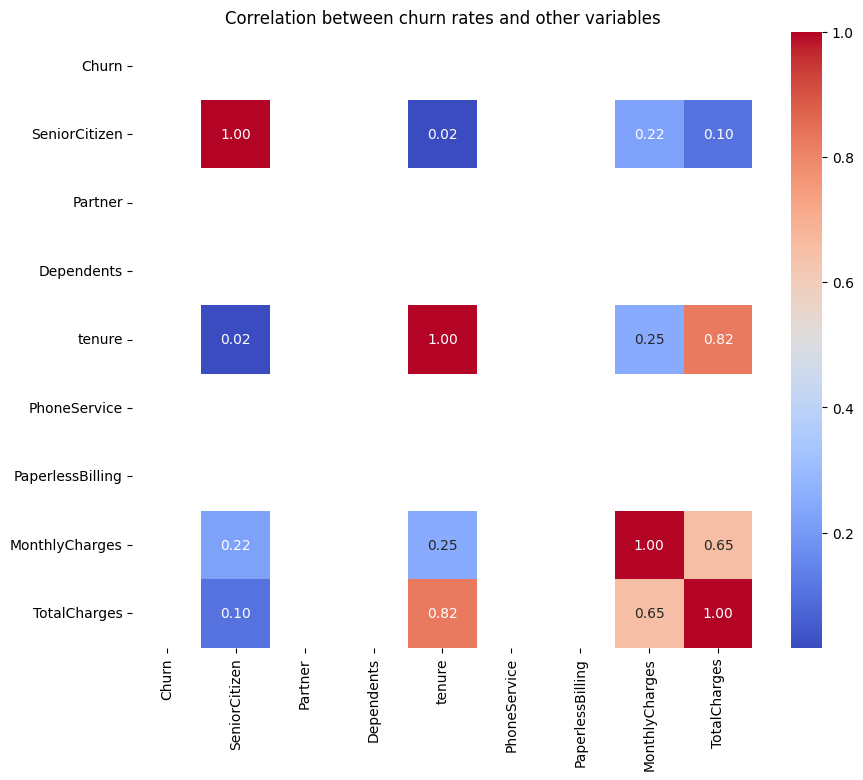

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Converting categorical columns to numeric
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})
data['Partner'] = data['Partner'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'No': 0, 'Yes': 1})
data['PhoneService'] = data['PhoneService'].map({'No': 0, 'Yes': 1})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'No': 0, 'Yes': 1})

# ploting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation between churn rates and other variables')
plt.show()


# Findings

Churn rates show a weak positive correlation with senior citizenship, while tenure exhibits a moderate negative correlation, indicating longer-tenured customers churn less. Other variables like partner status, dependents, phone service, and paperless billing show negligible correlations, with a modest positive correlation seen with monthly charges. Total charges do not significantly correlate with churn rates.